In [2]:
from scipy.stats import norm 
from scipy.stats import lognorm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

source: https://bmjopen.bmj.com/content/bmjopen/10/8/e039652.full.pdf

"Based on available evidence, we find that the incubation period  distribution  may  be  modelled  with  a  lognormal  distribution  with  pooled  mu  and  sigma  parameters  of  1.63  (1.51,  1.75)  and  0.50  (0.45,  0.55),  respectively."


1.0

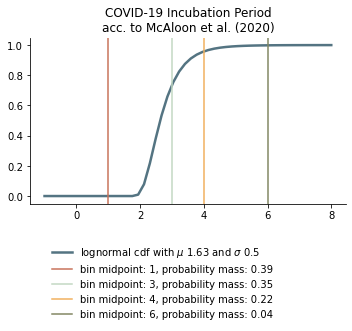

In [13]:
xs = np.linspace(-1, 8)
cdf_func = partial(lognorm.cdf, loc=1.63, s=0.5)
cdf_ys = cdf_func(x=xs)

def midpoint_with_p_mass(upper, lower=None, color="blue"):
    old_cdf = 0 if lower is None else cdf_func(lower)
    # do not move because cdf_func(5) could be > 0!
    lower = 0 if lower is None else lower
    prob_mass = round(cdf_func(upper) - old_cdf, 2)
    midpoint = round(0.5 * (upper + lower))
    label = f"bin midpoint: {midpoint}, probability mass: {prob_mass}"
    plt.axvline(midpoint, label=label, color=color)
    return prob_mass

fig, ax = plt.subplots(figsize=(5,5))
sns.lineplot(
    xs, cdf_ys, 
    label="lognormal cdf with $\mu$ 1.63 and $\sigma$ 0.5",     
    color="#547482", linewidth=2.5)
p1 = midpoint_with_p_mass(2.5, None, color="#C87259")
p2 = midpoint_with_p_mass(3, 2.5, color="#C2D8C2")
p3 = midpoint_with_p_mass(4, 3, color="#F1B05D")
p4 = midpoint_with_p_mass(8, 4, color="#818662")
lgd = plt.legend(frameon=False, bbox_to_anchor=(0.8, -0.2))
plt.title('COVID-19 Incubation Period\nacc. to McAloon et al. (2020)')
sns.despine()
plt.tight_layout()
plt.savefig(
    'incubation_period.png', bbox_inches='tight', bbox_extra_artists=(lgd,))

p1+p2+p3+p4

1.0